### Testing out different test of correlation

In [1]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

Here, we are importing various sets of tools that will help us read our data from our "your_off_facebook_activity"

In [2]:
with open(r"C:\Users\Alan\Desktop\FB DATA\ads_and_businesses\your_off-facebook_activity.json") as f:
    act = json.load(f)

In [3]:
act_df = pd.DataFrame(act['off_facebook_activity'], columns = ['name', 'events'])
act_df.head()

,name,events
0,wayfair.com,"[{'id': 654378075068342, 'type': 'VIEW_CONTENT..."
1,HBO Max,"[{'id': 3059412707403250, 'type': 'CUSTOM', 't..."
2,louddy.com,"[{'id': 288908522509425, 'type': 'PURCHASE', '..."
3,Wargaming Global,"[{'id': 722630277830558, 'type': 'CUSTOM', 'ti..."
4,Robinhood Markets Inc. & Robinhood Financial LLC,"[{'id': 944452026287077, 'type': 'CUSTOM', 'ti..."


Here we went ahead and converted the data into a date frame using pandas, we can see that I have a lack of usage for my facebook profile. However we do have a we sites that were tracked off facebook.

In [4]:
from scipy import stats

# Hypothesis

I believe that my Facebook activity will be inconclusive due to the lack of acitivity from my Facebook profile.

In [5]:
act['off_facebook_activity'][0]['events'][0]['type'] == 'ACTIVATE_APP'

False

In [6]:
apps_requests = [x['name'] for x in act['off_facebook_activity']]
all_event_count = [len(x['events']) for x in act['off_facebook_activity']]
activation_count = [len([x for x in j['events'] if x['type'] == 'ACTIVATE_APP']) for j in act['off_facebook_activity']]
custom_count = [len([x for x in j['events'] if x['type'] == 'CUSTOM']) for j in act['off_facebook_activity']]
search_count = [len([x for x in j['events'] if x['type'] == 'SEARCH']) for j in act['off_facebook_activity']]
view_content_count = [len([x for x in j['events'] if x['type'] == 'VIEW_CONTENT']) for j in act['off_facebook_activity']]
ad_request_count = [len([x for x in j['events'] if x['type'] == 'AD_REQUEST']) for j in act['off_facebook_activity']]
page_view_count = [len([x for x in j['events'] if x['type'] == 'PAGE_VIEW']) for j in act['off_facebook_activity']]

In [7]:
apps = []
events = []
actapp = []
custom = []
search = []
viewc = []
ad = []
view = []

for i in act['off_facebook_activity']:
    apps.append(i['name'])
    events.append((len(i['events'])))
    actapp.append(len([x for x in i['events'] if x['type'] == 'ACTIVATE_APP']))
    custom.append(len([x for x in i['events'] if x['type'] == 'CUSTOM']))
    search.append(len([x for x in i['events'] if x['type'] == 'SEARCH']))
    viewc.append(len([x for x in i['events'] if x['type'] == 'VIEW_CONTENT']))
    ad.append(len([x for x in i['events'] if x['type'] == 'AD_REQUEST']))
    view.append(len([x for x in i['events'] if x['type'] == 'PAGE_VIEW']))

In [8]:
appbyevent = pd.DataFrame(columns = ('App', 'Event Count', 'Activate App', 'Custom', 'Search', 'View Content', 'Ad Request', 'Page Views'))
appbyevent['App'] = apps
appbyevent['Event Count'] = events
appbyevent['Activate App'] = actapp
appbyevent['Custom'] = custom
appbyevent['Search'] = search
appbyevent['View Content'] = viewc
appbyevent['Ad Request'] = ad
appbyevent['Page Views'] = view
appbyevent.head()

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
0,wayfair.com,244,0,57,9,79,0,95
1,HBO Max,14,0,14,0,0,0,0
2,louddy.com,2,0,1,0,0,0,0
3,Wargaming Global,3,0,3,0,0,0,0
4,Robinhood Markets Inc. & Robinhood Financial LLC,2,0,2,0,0,0,0


C:\Users\Alan\anaconda3\envs\trial\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Alan\anaconda3\envs\trial\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Alan\anaconda3\envs\trial\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Alan\anaconda3\envs\trial\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0, flags=flags)


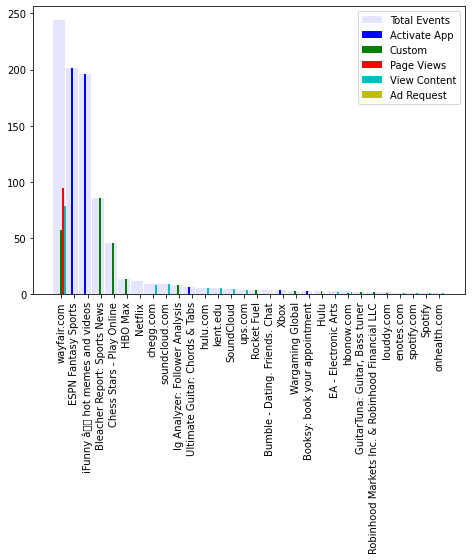

In [9]:
appbyevent = appbyevent.sort_values(by = ['Event Count'], ascending = False)
X = np.arange(30)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, appbyevent['Event Count'][0:30], color = 'b', alpha = .1, width = .90)
ax.bar(X + 0.00, appbyevent['Activate App'][0:30], color='b', width = .15)
ax.bar(X + 0.15, appbyevent['Custom'][0:30], color='g', width = .15)
ax.bar(X + 0.30, appbyevent['Page Views'][0:30], color='r', width = .15)
ax.bar(X + 0.45, appbyevent['View Content'][0:30], color='c', width = .15)
ax.bar(X+.60, appbyevent['Ad Request'][0:30], color = 'y', width = .15)
plt.xticks(ticks=X+.2, labels = list(appbyevent['App'][0:30]), rotation=90)
ax.legend(labels=['Total Events' ,'Activate App', 'Custom', 'Page Views', 'View Content', 'Ad Request'])
plt.show()

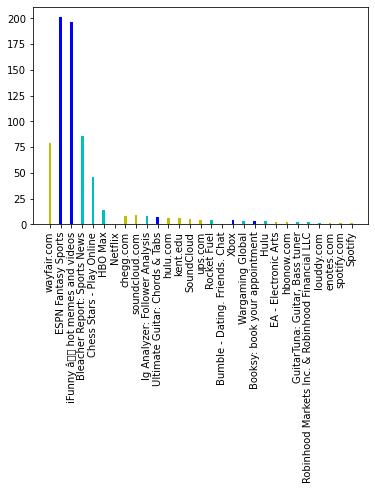

In [10]:
X = np.arange(30)
plt.bar(appbyevent['App'][0:29], appbyevent['Activate App'][0:29], color='b', width = .25)
plt.bar(appbyevent['App'][0:29], appbyevent['Custom'][0:29], color='c', width = .25)
plt.bar(appbyevent['App'][0:29], appbyevent['Search'][0:29], color='g', width = .25)
plt.bar(appbyevent['App'][0:29], appbyevent['View Content'][0:29], color='y', width = .25)
plt.xticks(rotation=90)
plt.show()

## Inconclusion

from the data we ahve gathered here we can clearly see that my hypothesis is wrong that in fact my off activity from facebook is apparent